# 머신러닝을 이용한 타이타닉 생존자 예측

In [1]:
# ! pip install plotly.express

^C


In [3]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### 생존현황

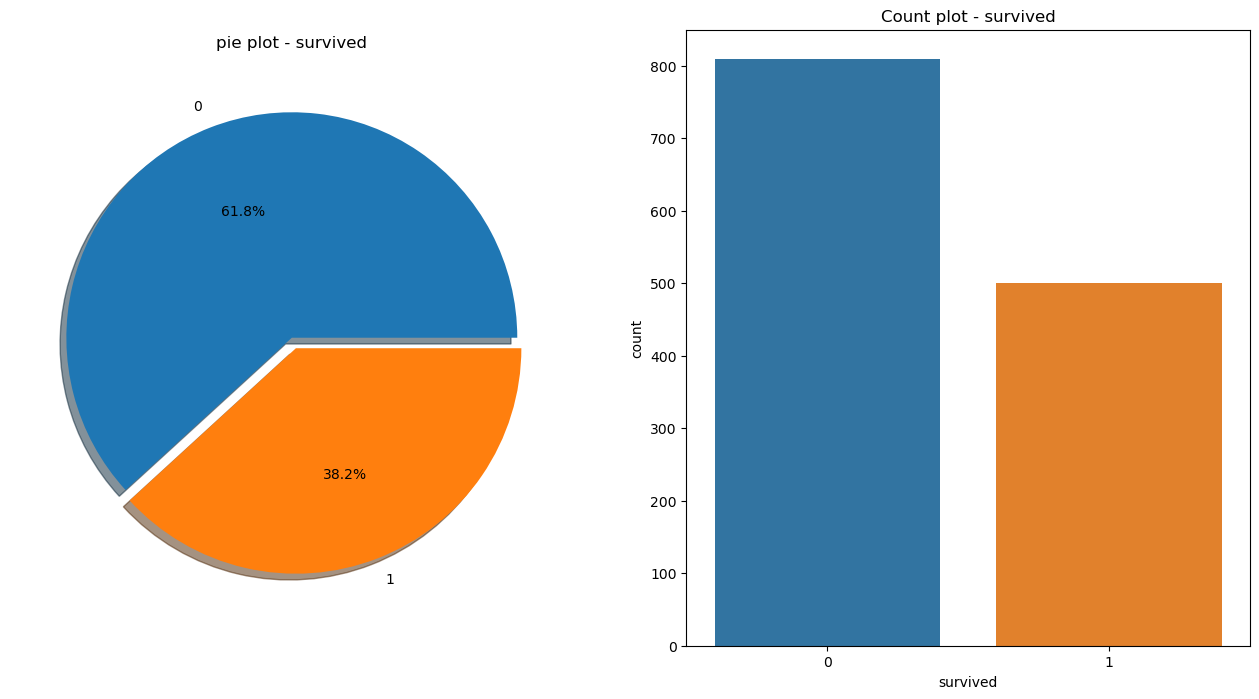

In [14]:
f, ax = plt.subplots(1,2, figsize= (16,8))
titanic['survived'].value_counts().plot.pie(ax = ax[0],autopct='%1.1f%%', shadow= True, explode=[0,0.05])
ax[0].set_title('pie plot - survived')
ax[0].set_ylabel('')

sns.countplot(x = 'survived', data = titanic, ax= ax[1])
ax[1].set_title("Count plot - survived")

plt.show()

### 성별에 따른 생존 현황

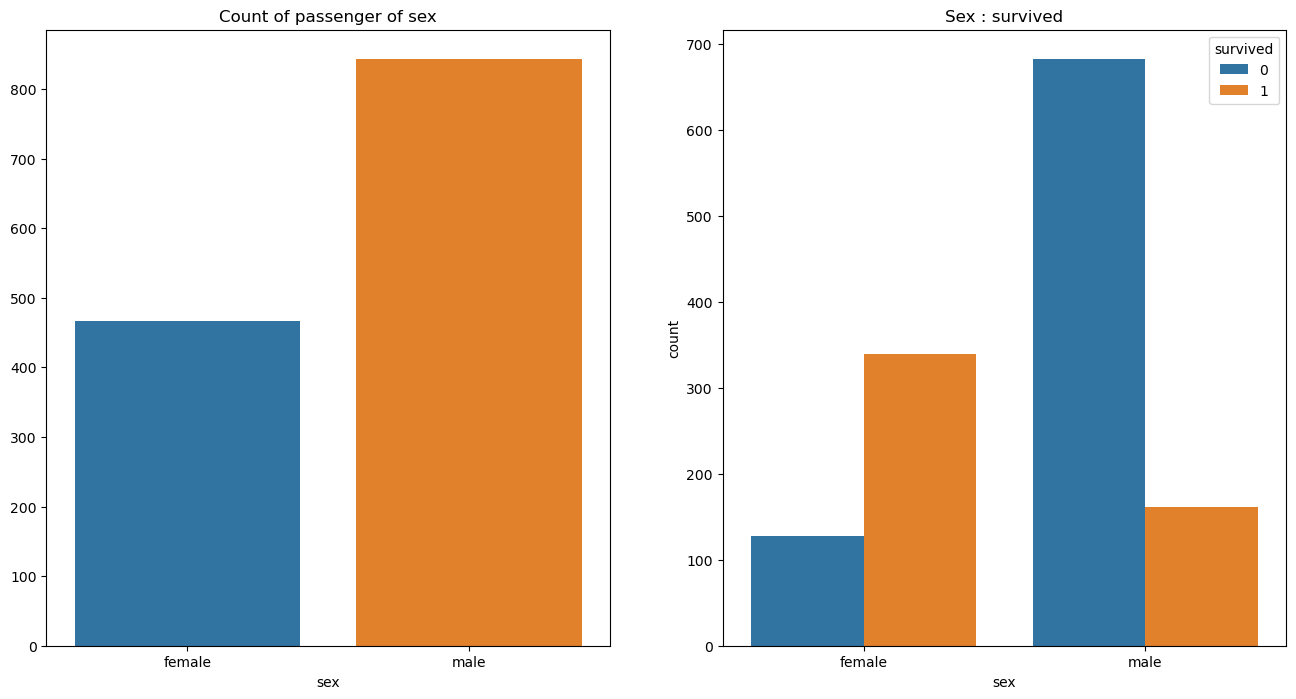

In [15]:
f, ax = plt.subplots(1,2, figsize= (16,8))

sns.countplot(x = 'sex', data = titanic, ax= ax[0])
ax[0].set_title('Count of passenger of sex')
ax[0].set_ylabel('')

sns.countplot(x = 'sex', data = titanic, hue = 'survived', ax= ax[1])
ax[1].set_title("Sex : survived")

plt.show()

남성의 생존율이 월등히 낮다

In [17]:
# 경제력 대비 생존율
pd.crosstab(titanic["pclass"], titanic["survived"], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


### 선실 등급별 성별 상황

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

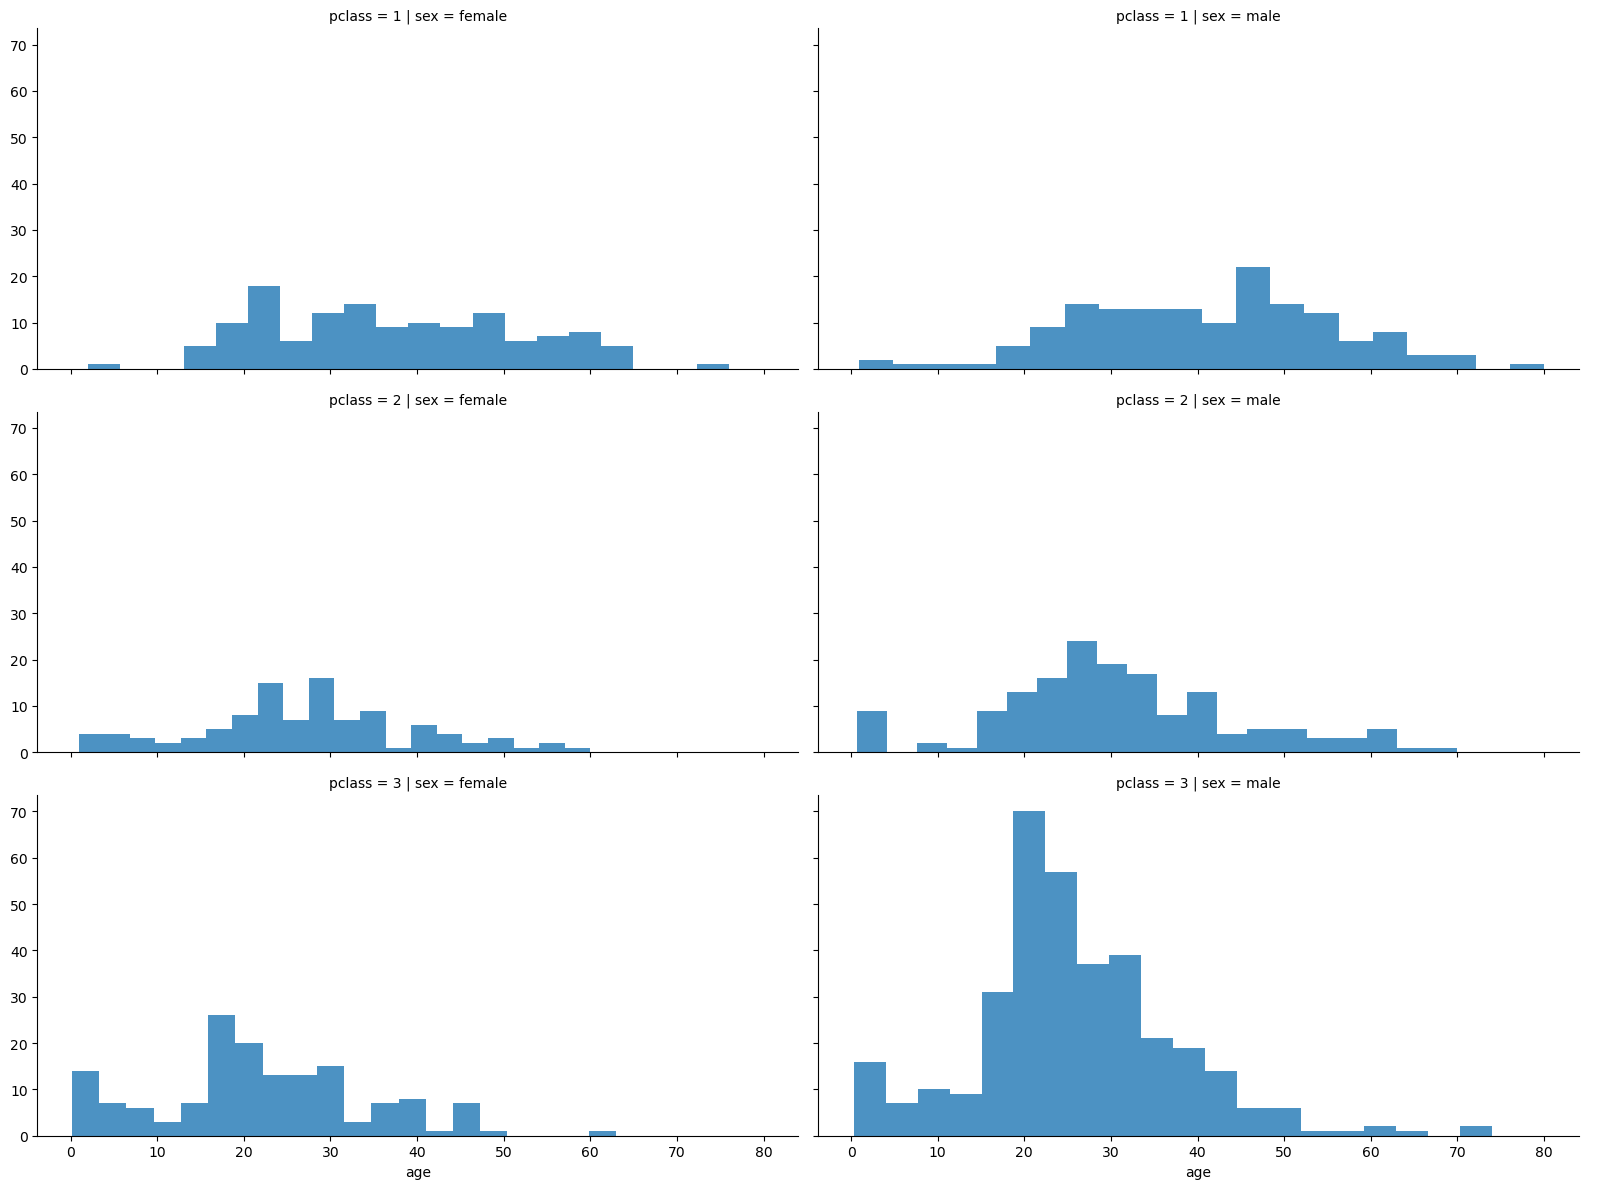

In [23]:
grid = sns.FacetGrid(data = titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.8, bins=20) # alpha = 투명도, bins = 범주
grid.add_legend();

### 나이별 승객 현황

In [24]:
import plotly.express as px
fig = px.histogram(titanic, x = 'age')
fig.show()

### 등실별 생존률을 연령별로 관찰

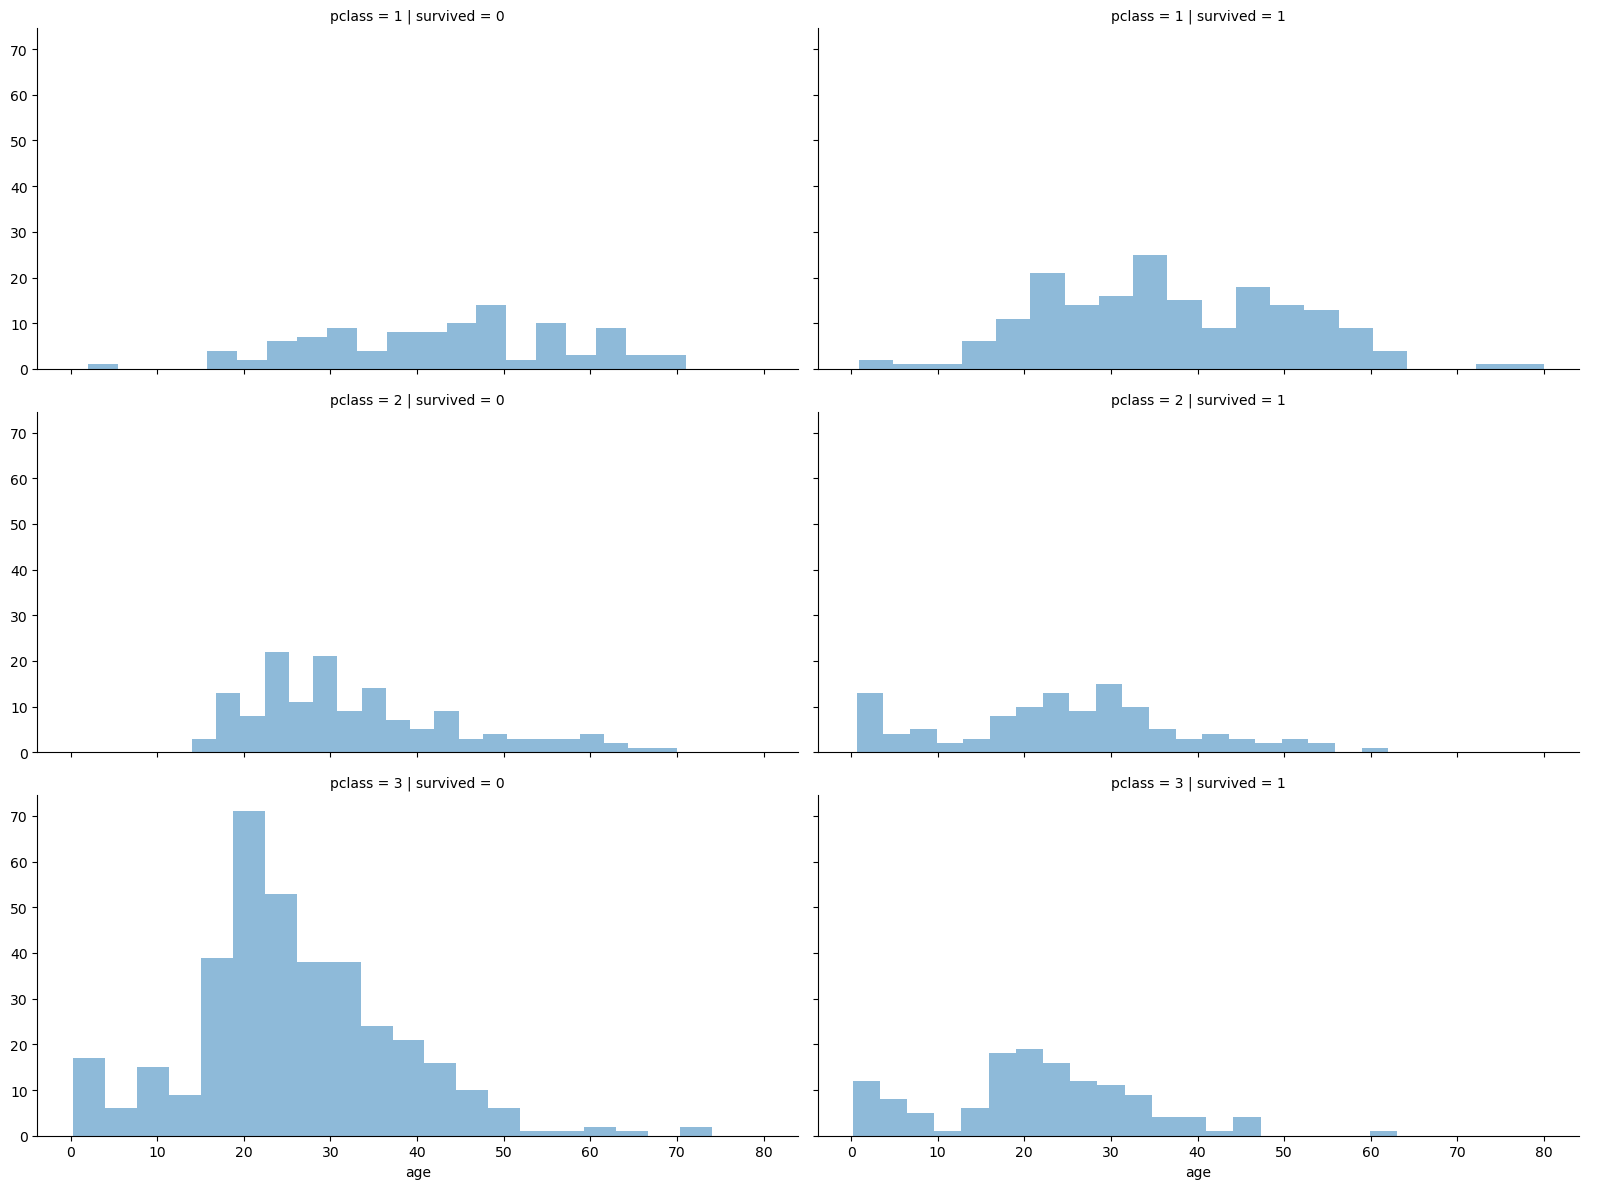

In [26]:
grid = sns.FacetGrid(data = titanic, row='pclass', col='survived', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=0.5, bins=20)
grid.add_legend();

In [28]:
titanic["age_cat"] = pd.cut(titanic['age'], bins=[0,7,15,30,60,100],
                            include_lowest = True, # 
                            labels=["baby", "teen","young","adult","old"]
                            )
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


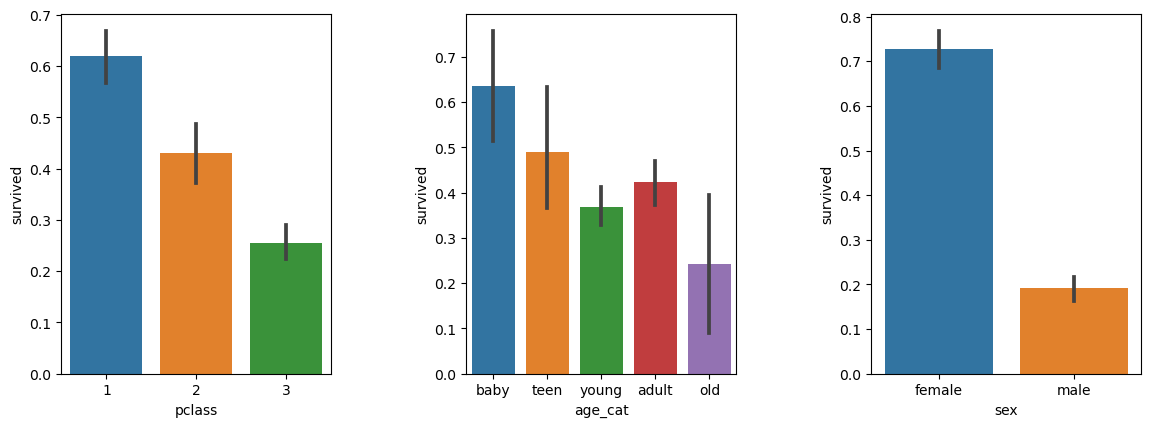

In [32]:
plt.figure(figsize=(12,4))
plt.subplot(131) # 1행 3열중 1번째
sns.barplot(x ='pclass', y = 'survived', data= titanic)

plt.subplot(132)
sns.barplot(x = 'age_cat', y = 'survived', data= titanic)

plt.subplot(133)
sns.barplot(x = 'sex', y = 'survived', data= titanic)

plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)

### 남/여 나이별 생존 상황을 보다 더 들여다보자

Text(0.5, 1.0, 'Male')

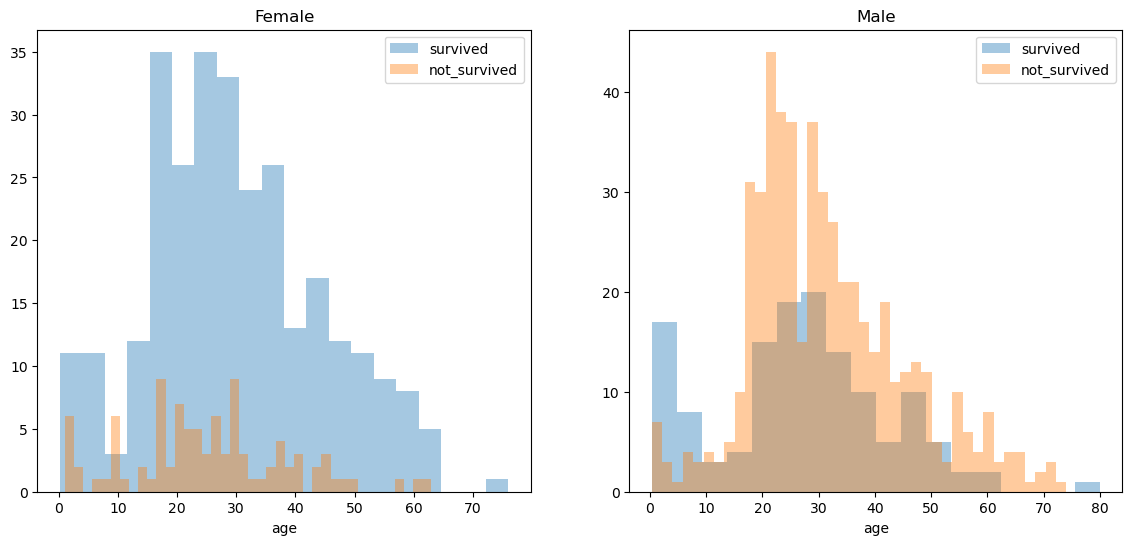

In [35]:
fig, axes = plt.subplots(nrows= 1, ncols=2, figsize = (14,6))

women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

ax = sns.distplot(women[women["survived"] == 1]["age"], bins = 20,
                 label = 'survived', ax = axes[0], kde=False
                 )
ax = sns.distplot(women[women["survived"] == 0]["age"], bins = 40,
                 label = 'not_survived', ax = axes[0], kde=False
                 )
ax.legend(); ax.set_title('Female')


ax = sns.distplot(men[men["survived"] == 1]["age"], bins = 18,
                 label = 'survived', ax = axes[1], kde=False
                 )
ax = sns.distplot(men[men["survived"] == 0]["age"], bins = 40,
                 label = 'not_survived', ax = axes[1], kde=False
                 )
ax.legend(); ax.set_title('Male')

### 탑승객 이름에서 신분 추출

In [36]:
for idx, dataset in titanic.iterrows():
    print(dataset["name"])

Allen, Miss. Elisabeth Walton
Allison, Master. Hudson Trevor
Allison, Miss. Helen Loraine
Allison, Mr. Hudson Joshua Creighton
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Anderson, Mr. Harry
Andrews, Miss. Kornelia Theodosia
Andrews, Mr. Thomas Jr
Appleton, Mrs. Edward Dale (Charlotte Lamson)
Artagaveytia, Mr. Ramon
Astor, Col. John Jacob
Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Aubart, Mme. Leontine Pauline
Barber, Miss. Ellen "Nellie"
Barkworth, Mr. Algernon Henry Wilson
Baumann, Mr. John D
Baxter, Mr. Quigg Edmond
Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Bazzani, Miss. Albina
Beattie, Mr. Thomson
Beckwith, Mr. Richard Leonard
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
Behr, Mr. Karl Howell
Bidois, Miss. Rosalie
Bird, Miss. Ellen
Birnbaum, Mr. Jakob
Bishop, Mr. Dickinson H
Bishop, Mrs. Dickinson H (Helen Walton)
Bissette, Miss. Amelia
Bjornstrom-Steffansson, Mr. Mauritz Hakan
Blackwell, Mr. Stephen Weart
Blank, Mr. Henry
Bonnell, Miss. Caroline
Bonnell, Miss

In [37]:
import re
for ids, dataset in titanic.iterrows():
    tmp = dataset['name']
    print(idx)
    print(re.search('\,\s\w+(\s\w+)?\.', tmp).group())

1308
, Miss.
1308
, Master.
1308
, Miss.
1308
, Mr.
1308
, Mrs.
1308
, Mr.
1308
, Miss.
1308
, Mr.
1308
, Mrs.
1308
, Mr.
1308
, Col.
1308
, Mrs.
1308
, Mme.
1308
, Miss.
1308
, Mr.
1308
, Mr.
1308
, Mr.
1308
, Mrs.
1308
, Miss.
1308
, Mr.
1308
, Mr.
1308
, Mrs.
1308
, Mr.
1308
, Miss.
1308
, Miss.
1308
, Mr.
1308
, Mr.
1308
, Mrs.
1308
, Miss.
1308
, Mr.
1308
, Mr.
1308
, Mr.
1308
, Miss.
1308
, Miss.
1308
, Mr.
1308
, Miss.
1308
, Miss.
1308
, Mr.
1308
, Mr.
1308
, Mr.
1308
, Dr.
1308
, Mrs.
1308
, Mrs.
1308
, Mrs.
1308
, Miss.
1308
, Major.
1308
, Mr.
1308
, Mr.
1308
, Mrs.
1308
, Mr.
1308
, Mrs.
1308
, Mr.
1308
, Mr.
1308
, Mr.
1308
, Master.
1308
, Miss.
1308
, Mr.
1308
, Mrs.
1308
, Mr.
1308
, Mrs.
1308
, Mr.
1308
, Mrs.
1308
, Mr.
1308
, Mrs.
1308
, Mr.
1308
, Mrs.
1308
, Miss.
1308
, Miss.
1308
, Mr.
1308
, Mrs.
1308
, Mr.
1308
, Mr.
1308
, Mrs.
1308
, Miss.
1308
, Mr.
1308
, Mr.
1308
, Miss.
1308
, Mr.
1308
, Mrs.
1308
, Mrs.
1308
, Mr.
1308
, Capt.
1308
, Miss.
1308
, Mrs.
13

In [42]:
title = []
for ids, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])
titanic["title"] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


In [43]:
pd.crosstab(titanic["title"], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [44]:
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Lady','the Countess']
Rare_m = ['Capt','Col','Don','Major','Rev','Sir','Jonkheer','Master','Dr']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [46]:
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,1.000000
4,Rare_m,0.448276


# 머신러닝을 이용한 생존자 예측

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic["sex"])

LabelEncoder()

In [48]:
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


In [49]:
titanic = titanic[titanic["age"].notnull()]
titanic = titanic[titanic["fare"].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 135.9+ KB


<Axes: >

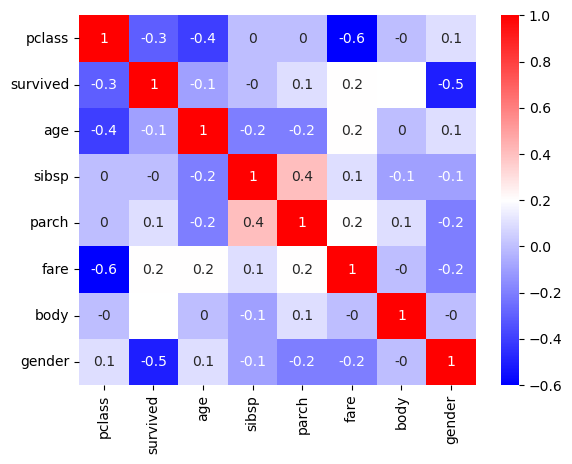

In [50]:
correlation_matrix = titanic.corr().round(1)
sns.heatmap(data= correlation_matrix, annot= True, cmap='bwr')

In [51]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'age_cat',
       'title', 'gender'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass','age','sibsp','parch','fare','gender']]
y = titanic['survived']

X_train, X_test, y_trin, y_test = train_test_split(X, y , test_size= 0.2, random_state=13)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_trin)

pred = dt.predict(X_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


### 디카프리오의 생존률

In [55]:
import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
print('Dicaprio : ', dt.predict_proba(dicaprio)[0,1])

Dicaprio :  0.16728624535315986


C:\Users\qnwje\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



### 윈슬릿의 생존률

In [56]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
print('Winslet : ', dt.predict_proba(winslet)[0,1])

Winslet :  1.0


C:\Users\qnwje\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

